58892288/58889256 [==============================] - 0s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________

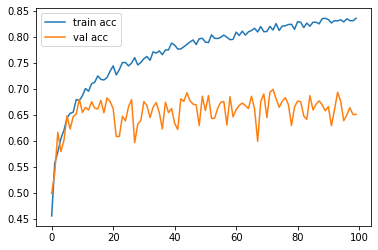

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
"""from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input"""
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/UpdatedDataset/trainset',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/UpdatedDataset/testset',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                           class_mode = 'categorical')


# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=int(9566/32),
  validation_steps=int(2391/32)
)
model.save('/content/drive/My Drive/Colab Notebooks/newdatasdpvgg100.h5')
"""
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
"""

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/AccVal_accNew')



In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/sdp2_2.h5')
model2 = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/sdp2.h5')
newmodel = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/newdatasdpvgg100.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/UpdatedDataset/trainset/bkl/ISIC_0026787.jpg', target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = model.predict(test_image)
result2 = model2.predict(test_image)
newr = newmodel.predict(test_image)

print(result)
print(result2)
print(newr)


[[0. 0. 0. 0. 0. 1. 0.]]
[[4.123185e-15 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  1.000000e+00 0.000000e+00]]
[[0.000000e+00 4.039461e-21 0.000000e+00 0.000000e+00 1.000000e+00]]
